## Stroke Risk Prediction 

In [3]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
sns.set_style("whitegrid")

# Load Dataset
df = pd.read_csv("strokeX.csv")
print("Dataset Shape:", df.shape)
display(df.head())

# Store the original columns
original_columns = df.columns.tolist()

# Unique patient record
print(f"Unique patients: {df.shape[0]} (1 record per patient assumed)")

# Basic descriptive stats
df.describe(include='all').T

Dataset Shape: (14976, 19)


,age,gender,chest_pain,high_bp,irregular_heartbeat,short_breath,fatigue,dizziness,swelling,neckjaw_pain,excess_sweating,persistent_cough,nausea_vomiting,chest_discomfort,cold_extremities,sleep_apnea,anxiety,stroke_risk_pct,at_risk
0,21,Male,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,18.5,0
1,32,Female,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,55.7,1
2,21,Male,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,23.0,0
3,51,Male,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,100.0,1
4,60,Female,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,100.0,1


Unique patients: 14976 (1 record per patient assumed)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,14976.0,NaN,NaN,NaN,43.178218,11.869719,18.0,34.0,42.0,52.0,86.0
gender,14976,2,Female,7507,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chest_pain,14976.0,NaN,NaN,NaN,0.216747,0.412042,0.0,0.0,0.0,0.0,1.0
high_bp,14976.0,NaN,NaN,NaN,0.345219,0.475456,0.0,0.0,0.0,1.0,1.0
irregular_heartbeat,14976.0,NaN,NaN,NaN,0.158053,0.364803,0.0,0.0,0.0,0.0,1.0
short_breath,14976.0,NaN,NaN,NaN,0.266827,0.442316,0.0,0.0,0.0,1.0,1.0
fatigue,14976.0,NaN,NaN,NaN,0.321448,0.467048,0.0,0.0,0.0,1.0,1.0
dizziness,14976.0,NaN,NaN,NaN,0.266894,0.442351,0.0,0.0,0.0,1.0,1.0
swelling,14976.0,NaN,NaN,NaN,0.218283,0.413094,0.0,0.0,0.0,0.0,1.0
neckjaw_pain,14976.0,NaN,NaN,NaN,0.162193,0.36864,0.0,0.0,0.0,0.0,1.0


### Part 1 - Exploratory Feature Analysis & Risk Engineering

#### 1.1 Age-Normalized Risk Index (ANRI) 

The **Age-Normalized Risk Index (ANRI)** identifies patients whose stroke risk is unusually high for their age.  
A higher ANRI indicates a higher stroke risk relative to age.

*ANRI is calculated by dividing each patient’s `stroke_risk_pct` by their `age`.*


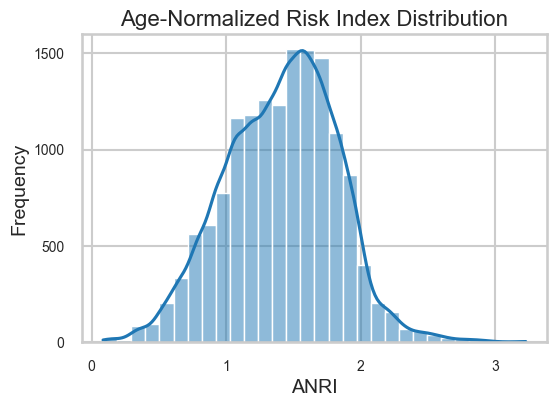

'Patients with highest ANRI values:'

,age,gender,chest_pain,high_bp,irregular_heartbeat,short_breath,fatigue,dizziness,swelling,neckjaw_pain,excess_sweating,persistent_cough,nausea_vomiting,chest_discomfort,cold_extremities,sleep_apnea,anxiety,stroke_risk_pct,at_risk,ANRI
589,31,Female,0,1,1,1,0,1,1,0,0,0,0,1,0,1,1,100.0,1,3.225806
3749,31,Male,0,1,0,1,1,1,0,1,1,0,0,1,1,1,0,100.0,1,3.225806
11337,31,Male,0,0,1,1,1,1,1,1,0,0,0,1,1,0,0,100.0,1,3.225806
14739,21,Female,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,67.5,1,3.214286
360,30,Male,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,92.1,1,3.070000
9612,31,Male,1,0,0,1,0,1,1,0,0,0,0,1,0,1,0,92.8,1,2.993548
1053,34,Female,1,1,0,1,0,0,0,1,0,1,0,1,1,0,0,100.0,1,2.941176
7975,34,Female,1,1,0,1,1,1,0,0,1,0,1,0,0,1,0,100.0,1,2.941176
5828,31,Female,0,1,1,1,0,0,1,0,0,0,1,0,1,1,0,90.7,1,2.925806
11778,31,Female,1,1,0,0,0,0,1,1,0,1,0,0,0,1,1,90.7,1,2.925806


In [ ]:
from heapq import nlargest


def compute_anri(df):
    """
    Compute and visualize the Age-Normalized Risk Index (ANRI)
    """

    df['age'].replace(0, np.nan, inplace=True)
    df['ANRI'] = df['stroke_risk_pct']/df['age']

    # Plotting ANRI distribution
    plt.figure(figsize=(6, 4))
    sns.histplot(df['ANRI'], kde=True, bins=30)
    plt.xlabel('ANRI', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.title('Age-Normalized Risk Index Distribution', fontsize=16)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    plt.show()

    # Top 10 patients with highest ANRI
    top_anri = df.nlargest(10, 'ANRI')
    display('Patients with highest ANRI values:')
    display(top_anri)
    
    return df

df = compute_anri(df)

> ANRI Interpretation:

> We can observe, patients with highest ANRI have high chances of stroke rate at lower age. A young patient with high risk of stroke has higher ANRI whereas an older patient with high risk of stroke has lower ANRI. Majority of the patients experience short breath, chest discomfort and dizziness

#### 1.2 Chronic Condition Score (CCS) 

The **Chronic Condition Score (CCS)** represents the number of chronic cardiovascular conditions a patient has, specifically high blood pressure and irregular heartbeat.  
A higher CCS indicates greater chronic disease burden.

*CCS is the sum of the binary columns `high_bp` and `irregular_heartbeat`.*


Average Stroke risk: 
    CCS  stroke_risk_pct
0    0        52.715864
1    1        72.368611
2    2        85.895017


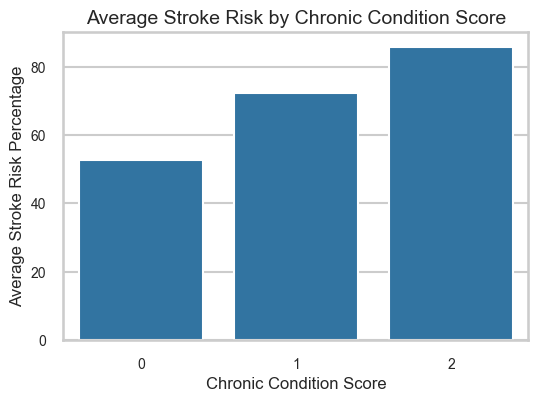

In [ ]:
def compute_ccs(df):
    """
    Compute and visualize the Chronic Condition Score (CCS)
    """
    
    df['CCS']= df['high_bp']+ df['irregular_heartbeat']

    avg_stroke_risk= df.groupby('CCS')['stroke_risk_pct'].mean().reset_index()
    print(f'Average Stroke risk: \n {avg_stroke_risk}')

    # Plotting Average Stroke Risk by CCS
    plt.figure(figsize=(6,4))
    sns.barplot(x= avg_stroke_risk['CCS'], y=avg_stroke_risk['stroke_risk_pct'])
    plt.xlabel('Chronic Condition Score', fontsize=12)
    plt.ylabel('Average Stroke Risk Percentage', fontsize=12)
    plt.title('Average Stroke Risk by Chronic Condition Score', fontsize=14)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()
    
    return df

ccs_summary = compute_ccs(df)

> Interpretation: 

> From the above graph, we can observe Stroke risk is directly dependent on Chronic condition score (CCS). The higher CCS results in high risk of stroke. Patients with no chronic conditions have lowest stroke risk.

#### 1.3 Symptom Burden Index (SBI) 

The **Symptom Burden Index (SBI)** quantifies the total number of symptoms reported by each patient.  
A higher SBI indicates a greater overall symptom load, which is expected to relate to higher stroke risk.

*SBI is the sum of all symptom indicator columns (values 0 or 1).*


Average stroke risk: 
   sbi_category  stroke_risk_pct
0          Low        49.696303
1     Moderate        81.423182
2         High        99.275068


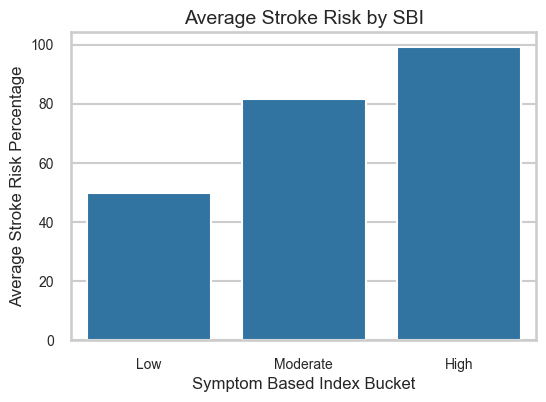

Correlation between SBI and Stroke Risk Percentage: 0.682


In [ ]:
def compute_sbi(df):
    """
    Compute the Symptom Burden Index (SBI)
    """
    symptom_cols= [
    'chest_pain', 'high_bp', 'irregular_heartbeat', 'short_breath', 'fatigue','dizziness', 'swelling', 
    'neckjaw_pain', 'excess_sweating', 'persistent_cough', 'nausea_vomiting', 'chest_discomfort', 'cold_extremities', 
    'sleep_apnea', 'anxiety']

    df['SBI']= df[symptom_cols].sum(axis=1)
    df['sbi_category']= pd.cut(df['SBI'], bins=[0,3,6,15], labels=['Low', 'Moderate', 'High'], right=True)
    sbi_avg_risk= df.groupby('sbi_category')['stroke_risk_pct'].mean().reset_index()
    print(f'Average stroke risk: \n {sbi_avg_risk}')

    # Plotting Average Stroke Risk by SBI
    plt.figure(figsize=(6,4))
    sns.barplot(x= sbi_avg_risk['sbi_category'], y=sbi_avg_risk['stroke_risk_pct'])
    plt.xlabel('Symptom Based Index Bucket', fontsize=12)
    plt.ylabel('Average Stroke Risk Percentage', fontsize=12)
    plt.title('Average Stroke Risk by SBI', fontsize=14)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

    correlation= df['SBI'].corr(df['stroke_risk_pct'])
    print(f"Correlation between SBI and Stroke Risk Percentage: {correlation:.03f}")

    return sbi_avg_risk
    

sbi_summary = compute_sbi(df)

> SBI Interpretation:

> Stroke Risk increases proportionally with the increase in Symptom Index. Patients in high SBI group have nearly double the risk of patients in low SBI group. Additionally correlation of SBI and stroke based index indicates that they have a strong positive correlation i.e., one value increases with the increase in other.

#### 1.4 Symptom Predictive Power using Mutual Information (MI) 

**Mutual Information (MI)** measures how informative a feature is for predicting a target variable.  
Here, it shows how strongly each symptom relates to the stroke risk label (`at_risk`).

*Use *`mutual_info_classif`* from *`sklearn.feature_selection`* to compute MI scores.*

In [ ]:
from sklearn.feature_selection import mutual_info_classif

def compute_mi(df):
    """
    Compute the Mutual Information (MI) score
    """
    symptom_cols= [
    'chest_pain', 'high_bp', 'irregular_heartbeat', 'short_breath', 'fatigue','dizziness', 'swelling', 
    'neckjaw_pain', 'excess_sweating', 'persistent_cough', 'nausea_vomiting', 'chest_discomfort', 'cold_extremities', 
    'sleep_apnea', 'anxiety']

    X, y= df[symptom_cols], df['at_risk']

    # MI Score Calculation
    mi= mutual_info_classif(X, y, discrete_features=True, random_state=42)
    mi= pd.Series(mi)
    mi.index= symptom_cols
    mi.sort_values(ascending=False, inplace=True)
    print(f'Mutual Information Scores: \n{mi.head(10)}')

    return mi

mi_summary = compute_mi(df)

Mutual Information Scores: 
high_bp                0.053896
chest_pain             0.026680
sleep_apnea            0.019900
short_breath           0.017089
chest_discomfort       0.015901
irregular_heartbeat    0.013239
fatigue                0.008724
cold_extremities       0.006621
dizziness              0.006162
swelling               0.005306
dtype: float64


#### 1.5 Age-Adjusted Risk Z-Scores (AARZ) 

The **Age-Adjusted Risk Z-Score (AARZ)** compares a patient’s stroke risk to others in the same age group.  
It highlights patients whose risk levels are unusually high or low relative to their peers.

* For each 10-year age group, calculate how many standard deviations a patient’s stroke risk percentage is above or below the group’s mean value.*


In [8]:
def compute_aarz(df):
    """
    Compute Age-Adjusted Risk Z-Scores (AARZ)
    """
    bins=list(range(0, 151, 10))
    df['age_group']= pd.cut(df['age'], bins= bins, labels=[f'{i}-{i+9}' for i in bins[1:]], right=False)

    df['AARZ']= df.groupby('age_group')['stroke_risk_pct'].transform(lambda x: (x - x.mean()) / x.std())
    top5_outliers= df.nlargest(5, 'AARZ')
    top2_per_group= df.sort_values(['age_group', 'AARZ'], ascending=[True, False]).groupby('age_group').head(2)

    print('Top 5 Outliers based on AARZ:')
    display(top5_outliers[['age','stroke_risk_pct', 'ANRI']])
    print('Top 2 patients per Age Group based on AARZ:')
    display(top2_per_group[['age_group','stroke_risk_pct', 'ANRI']])

    return top5_outliers, top2_per_group
    
top5_outliers, top_by_group = compute_aarz(df)

Top 5 Outliers based on AARZ:


,age,stroke_risk_pct,ANRI
8699,26,74.8,2.876923
2185,26,68.2,2.623077
14739,21,67.5,3.214286
11930,27,67.1,2.485185
12298,29,66.5,2.293103


Top 2 patients per Age Group based on AARZ:


,age_group,stroke_risk_pct,ANRI
9288,20-29,51.6,2.715789
12113,20-29,46.6,2.452632
8699,30-39,74.8,2.876923
2185,30-39,68.2,2.623077
589,40-49,100.0,3.225806
1053,40-49,100.0,2.941176
845,50-59,100.0,2.222222
895,50-59,100.0,2.222222
3,60-69,100.0,1.960784
6,60-69,100.0,1.724138


#### 1.6 Risk Consistency Index (RCI) 

The **Risk Consistency Index (RCI)** measures how well the continuous stroke risk scores align with the binary label `at_risk`.  
It captures how distinctly the two groups: *at risk* and *not at risk*, differ in their average stroke risk percentage.
Higher RCI values indicate stronger consistency between risk scores and the `at_risk` label.

*RCI is calculated by taking the absolute difference between the group means and dividing it by the pooled standard deviation.*  


In [9]:
from numpy import std


def compute_rci(df):
    """
    Compute the Risk Consistency Index (RCI) 
    """
    std_dev= df.groupby('at_risk')['stroke_risk_pct'].std()
    mean= df.groupby('at_risk')['stroke_risk_pct'].mean()
    frequency= df.groupby('at_risk')['stroke_risk_pct'].count()
    print(f'Standard deviation: \n{std_dev}')
    print(f'Mean: \n{mean}')
    print(f'Frequency: \n{frequency}')

    pooled_std= np.sqrt(
        ((frequency[0]-1)* std_dev[0]**2 +(frequency[1]-1)* std_dev[1]**2)
        / (frequency[0]+frequency[1]+2)
    )
    RCI = abs(mean[0] - mean[1])/pooled_std
    
    return RCI

RCI = compute_rci(df)
print(f'Risk Consistency Index: {RCI:.3f}')

Standard deviation: 
at_risk
0    10.266726
1    18.024955
Name: stroke_risk_pct, dtype: float64
Mean: 
at_risk
0    34.854316
1    79.363510
Name: stroke_risk_pct, dtype: float64
Frequency: 
at_risk
0    5757
1    9219
Name: stroke_risk_pct, dtype: int64
Risk Consistency Index: 2.870


> Interpretation:

> The RCI value observed in high i.e. ~2.9 indicating the group of patients at risk have higher stroke risk scores compared to group of patients not at risk. Hence, it indicates the labels are strongly consistent.

#### Q1.7 Composite Health Risk Index (CHRI) 

The **Composite Health Risk Index (CHRI)** combines multiple cardiovascular indicators into a single, weighted risk score.  
It integrates *high blood pressure*, *irregular heartbeat*, and *age-normalized risk (ANRI)* to capture an individual’s overall health vulnerability.

*Compute CHRI using the weighted formula:  *CHRI = 0.4 * High Blood Pressure + 0.4 * Irregular Heartbeat + 0.2 * ANRI*


In [10]:
def compute_chri(df):
    """
    Compute the Composite Health Risk Index (CHRI) 
    """
    
    df['CHRI'] = 0.4*df['high_bp'] + 0.4*df['irregular_heartbeat'] + 0.2*df['ANRI']
    top_chri = df.nlargest(5, 'CHRI')
    corr_chri_risk = df[['CHRI','stroke_risk_pct']].corr().loc['CHRI','stroke_risk_pct']
    corr_chri_label = df[['CHRI','at_risk']].corr().loc['CHRI','at_risk']

    print('Top 5 patients based on CHRI:')
    display(top_chri)
    print(f'Correlation between CHRI and Stroke Risk Percentage: {corr_chri_risk:.04f}')
    print(f'Correlation between CHRI and At Risk Label: {corr_chri_label:.04f}')

    return df, top_chri, corr_chri_risk, corr_chri_label

df, top_chri, corr_chri_risk, corr_chri_label = compute_chri(df)

Top 5 patients based on CHRI:


,age,gender,chest_pain,high_bp,irregular_heartbeat,short_breath,fatigue,dizziness,swelling,neckjaw_pain,...,anxiety,stroke_risk_pct,at_risk,ANRI,CCS,SBI,sbi_category,age_group,AARZ,CHRI
589,31,Female,0,1,1,1,0,1,1,0,...,1,100.0,1,3.225806,2,8,High,40-49,3.254954,1.445161
5828,31,Female,0,1,1,1,0,0,1,0,...,0,90.7,1,2.925806,2,7,High,40-49,2.684568,1.385161
43,33,Male,1,1,1,0,1,0,0,1,...,0,95.9,1,2.906061,2,6,Moderate,40-49,3.003494,1.381212
2879,31,Male,1,1,1,1,0,0,0,0,...,0,88.3,1,2.848387,2,5,Moderate,40-49,2.537372,1.369677
11279,32,Male,1,1,1,0,0,0,1,0,...,1,89.6,1,2.800000,2,6,Moderate,40-49,2.617103,1.360000


Correlation between CHRI and Stroke Risk Percentage: 0.5661
Correlation between CHRI and At Risk Label: 0.4875


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### Q1.8 Risk Stratification Buckets (5 points)

The **Risk Stratification Buckets** divide patients into *Low*, *Moderate*, and *High* risk groups based on their normalized stroke risk percentage.  
This helps compare how *age*, *symptom burden (SBI)*, and *chronic conditions (CCS)* vary across different risk levels.

*Hint: Normalize `stroke_risk_pct` by dividing by 100, then assign each patient to a risk category.*

**Tasks:**
1. Categorize patients into three buckets — *Low (0–0.3)*, *Moderate (0.3–0.7)*, *High (0.7–1.0)*. For each group, compute the average **age**, **SBI**, and **CCS**.  
2. Visualize these averages using a bar plot with a log scale on the y-axis and interpret how patient characteristics differ by risk level.

Summary of Risk buckets: 
  risk_category    avg_age   avg_sbi   avg_ccs
0           Low  29.332577  1.652100  0.127696
1      Moderate  38.365155  2.895121  0.386237
2          High  53.879231  4.300247  0.775564


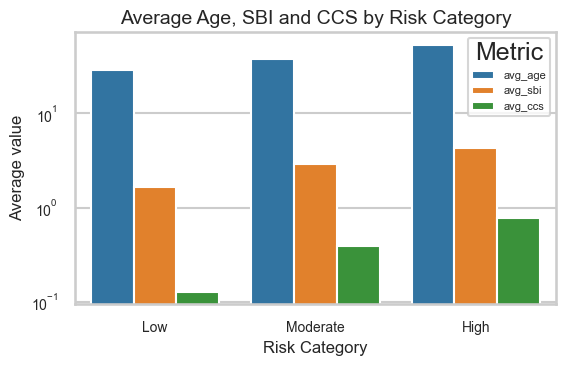

In [11]:
from tkinter import font


def compute_risk_buckets(df):
    """
    Create risk stratification buckets based on normalized stroke risk percentage
    """
    df['stroke_risk_norm']= df['stroke_risk_pct']/100
    df['risk_category'] = pd.cut(
        df['stroke_risk_norm'], 
        bins=  [0, 0.3, 0.7, 1.0], 
        labels=['Low', 'Moderate', 'High']
    )
    bucket_summary = df.groupby('risk_category').agg(
        avg_age = ('age', 'mean'),
        avg_sbi = ('SBI', 'mean'),
        avg_ccs = ('CCS', 'mean')
    ).reset_index()

    print(f'Summary of Risk buckets: \n{bucket_summary}')

    risk_melted = bucket_summary.melt(id_vars='risk_category', value_vars=['avg_age', 'avg_sbi', 'avg_ccs'],
                                    var_name='Metric', value_name='Average_Value')

    plt.figure(figsize=(6,4))
    sns.barplot(x='risk_category', y='Average_Value', hue='Metric', data=risk_melted)
    plt.yscale('log')
    plt.title('Average Age, SBI and CCS by Risk Category', fontsize=14)
    plt.xlabel('Risk Category', fontsize=12)
    plt.ylabel('Average value', fontsize=12)
    plt.legend(title='Metric', fontsize=8)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()

    return bucket_summary

bucket_summary = compute_risk_buckets(df)

> Interpretation:

> Stroke risk of patients increase gradually as patients tend to be older. It maintains a similar trend with SBI and CCS where increase in these values tend to increase the stroke risk in patients. This indicates the age, SBI and CCS i.e. the cardio vascular factors for patients highly impact their stroke risk.

In [12]:
# Newly Created Columns
current_columns = df.columns.tolist()
new_columns = [col for col in current_columns if col not in original_columns]

print("Columns present in the final DataFrame:\n")
print(current_columns)

print("\n Newly created columns:")
if new_columns:
    print(new_columns)
else:
    print("No new columns were created")

Columns present in the final DataFrame:

['age', 'gender', 'chest_pain', 'high_bp', 'irregular_heartbeat', 'short_breath', 'fatigue', 'dizziness', 'swelling', 'neckjaw_pain', 'excess_sweating', 'persistent_cough', 'nausea_vomiting', 'chest_discomfort', 'cold_extremities', 'sleep_apnea', 'anxiety', 'stroke_risk_pct', 'at_risk', 'ANRI', 'CCS', 'SBI', 'sbi_category', 'age_group', 'AARZ', 'CHRI', 'stroke_risk_norm', 'risk_category']

 Newly created columns:
['ANRI', 'CCS', 'SBI', 'sbi_category', 'age_group', 'AARZ', 'CHRI', 'stroke_risk_norm', 'risk_category']


### Part 2 - Clustering: Patient Risk Profiles


#### 2.1 Feature Preparation for Clustering 



In [ ]:
from sklearn.preprocessing import StandardScaler

def prepare_clustering_features(df):
    """
    Select and standardize relevant continuous features for clustering.
    Returns the scaled feature matrix and its corresponding DataFrame.
    """    
    # Standardizing features
    sc= StandardScaler()
    features= ['age', 'SBI', 'CCS', 'ANRI', 'stroke_risk_pct']
    X= df[features]

    X_scaled= sc.fit_transform(X)
    X_scaled= pd.DataFrame(X_scaled, columns=features)
    
    print(f'Dataset shape after scaling: {X_scaled.shape}')
    print(f'Numerical featuring after scaling:')
    display(X_scaled.head())
    return X_scaled
X_scaled = prepare_clustering_features(df)

Dataset shape after scaling: (14976, 5)
Numerical featuring after scaling:


,age,SBI,CCS,ANRI,stroke_risk_pct
0,-1.868533,-0.898873,0.821920,-1.277754,-1.642857
1,-0.941774,1.206134,0.821920,0.797177,-0.246071
2,-1.868533,-0.898873,-0.832747,-0.760548,-1.473891
3,0.658991,0.504465,-0.832747,1.328560,1.417306
4,1.417249,-0.197204,2.476587,0.618669,1.417306


#### 2.2 Optimal Number of Clusters (Elbow & Silhouette Methods) (20 points)

To determine the appropriate number of clusters (**k**), we use two evaluation methods:

- **Elbow Method:** observes the point where inertia (within-cluster variance) stops decreasing sharply.  
- **Silhouette Score:** measures how well clusters are separated (higher = better).  



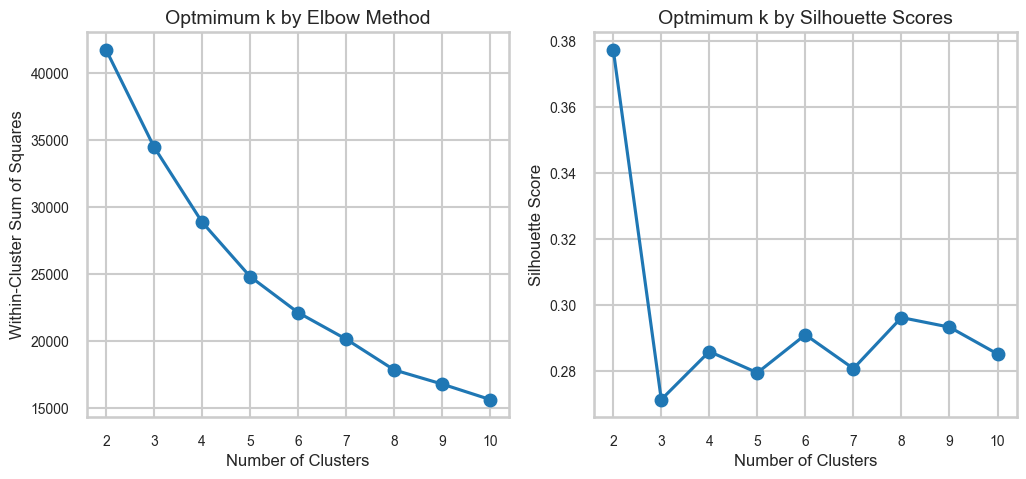

<Figure size 1000x600 with 0 Axes>

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def evaluate_kmeans_clusters(X_scaled, k_min=2, k_max=10):
    """
    Evaluate optimal number of clusters (k) using Elbow and Silhouette methods.
    Computes inertia and silhouette scores for k in [k_min, k_max].
    """
    int_list= []
    sil_score_list=[]
    for i in range(k_min, k_max + 1):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(X_scaled)
        inertia= kmeans.inertia_
        sil_score= silhouette_score(X_scaled, kmeans.labels_)
        int_list.append(inertia)
        sil_score_list.append(sil_score)

    # Plotting Inertia (Elbow Method)    
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    axes[0].plot(range(k_min, k_max + 1), int_list, marker='o')
    axes[0].set_title('Optmimum k by Elbow Method', fontsize=14)
    axes[0].set_xlabel('Number of Clusters', fontsize=12)
    axes[0].set_ylabel('Within-Cluster Sum of Squares', fontsize=12)
    axes[0].tick_params(axis='x', labelsize=10)
    axes[0].tick_params(axis='y', labelsize=10)

    # Plotting Silhouette Scores
    plt.figure(figsize=(10,6))
    axes[1].plot(range(k_min, k_max + 1), sil_score_list, marker='o')
    axes[1].set_title('Optmimum k by Silhouette Scores', fontsize=14)
    axes[1].set_xlabel('Number of Clusters', fontsize=12)
    axes[1].set_ylabel('Silhouette Score', fontsize=12)
    axes[1].tick_params(axis='x', labelsize=10)
    axes[1].tick_params(axis='y', labelsize=10)

    plt.tight_layout()
    plt.show()
    
opt_df = evaluate_kmeans_clusters(X_scaled)

#### 2.3 K-Means Clustering and Visualization (15 points)

Using the results from the previous analysis, choosing number of clusters as 3.

**K-Means** partitions patients into groups such that individuals in the same cluster are more similar to each other based on selected numeric features, while those in different clusters are more dissimilar.


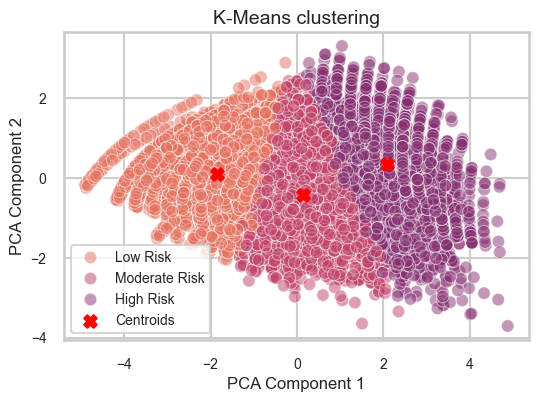

In [ ]:
from pyparsing import alphas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

def perform_kmeans_clustering(df, X_scaled, k=3):
    """
    Fit K-Means clustering, project to 2D PCA space, and visualize clusters.
    Returns DataFrame with cluster labels and centroids in PCA space.
    """
    kmeans = KMeans(n_clusters=3, random_state=42)
    df['cluster']= kmeans.fit_predict(X_scaled)
    y_predict= kmeans.labels_

    # PCA- 2D projection
    pca= PCA(n_components=2, random_state=42)
    pca_2d= pca.fit_transform(X_scaled)
    centroids_pca= pca.transform(kmeans.cluster_centers_)

    df['PCA1']= pca_2d[:,0]
    df['PCA2']= pca_2d[:,1]

    # map clusters to risk labels
    cluster_risk = df.groupby('cluster')['stroke_risk_pct'].mean().sort_values()
    df['cluster_label'] = df['cluster'].map(
                            {cluster_risk.index[0]: 'Low Risk',
                            cluster_risk.index[1]: 'Moderate Risk',
                            cluster_risk.index[2]: 'High Risk'}
                        )
    
    df['KMeans']= y_predict

    # Plotting K-Means clusters
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='cluster_label', palette='flare', alpha=0.5)
    plt.scatter(centroids_pca[:,0], centroids_pca[:,1], c='red', marker='X', label='Centroids')
    plt.title('K-Means clustering', fontsize=14)
    plt.xlabel('PCA Component 1', fontsize=12)
    plt.ylabel('PCA Component 2', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(fontsize=10)
    plt.show()
    return df, centroids_pca

df, centroids_pca = perform_kmeans_clustering(df, X_scaled, k=3)

#### 2.4 Cluster Profiling and Interpretation 

Once the clusters are formed, it is important to interpret what each group represents.  
We can do this by computing the **average feature values** for key indicators such as  
`age`, `SBI`, `CCS`, `ANRI`, and `stroke_risk_pct`.


In [16]:
def cluster_profiling(df):
    """
    Summarize and display average feature values for each cluster.
    """
    avg_features= df.groupby('cluster_label')[['age', 'SBI', 'CCS', 'ANRI', 'stroke_risk_pct']].mean()

    order = ['Low Risk', 'Moderate Risk', 'High Risk']
    avg_features = avg_features.loc[order]
    print('Average characteristics per cluster:')
    display(avg_features)

    return avg_features

cluster_profile = cluster_profiling(df)

Average characteristics per cluster:


,age,SBI,CCS,ANRI,stroke_risk_pct
cluster_label,,,,,
Low Risk,36.052350,2.101382,0.130876,0.985891,35.629217
Moderate Risk,39.762772,3.438812,0.581386,1.555344,60.843782
High Risk,55.598978,4.525883,0.864475,1.759245,95.925106


> Cluster Profile:

Low risk - In general, this group contains younger patients with low chronological conditions and symptoms, having less chaces of stroke risk

Moderate risk - People in middle aged group are at moderate risk having having some symptom burden, chronological conditions and risk index. 

High risk - High risk category includes patients of older age, with multiple symptoms, higher CCS and ANRI. These patients have higher stroke risk percentages

#### 2.5 Cluster Risk Comparison 

To evaluate the clinical significance of each cluster, we compare their overall stroke risk levels.  
This helps determine whether certain clusters represent higher medical vulnerability.



Cluster Risk summary:


,cluster_label,avg_stroke_risk,at_risk_pct
0,Low Risk,35.629217,0.111521
1,Moderate Risk,60.843782,0.814455
2,High Risk,95.925106,1.000000


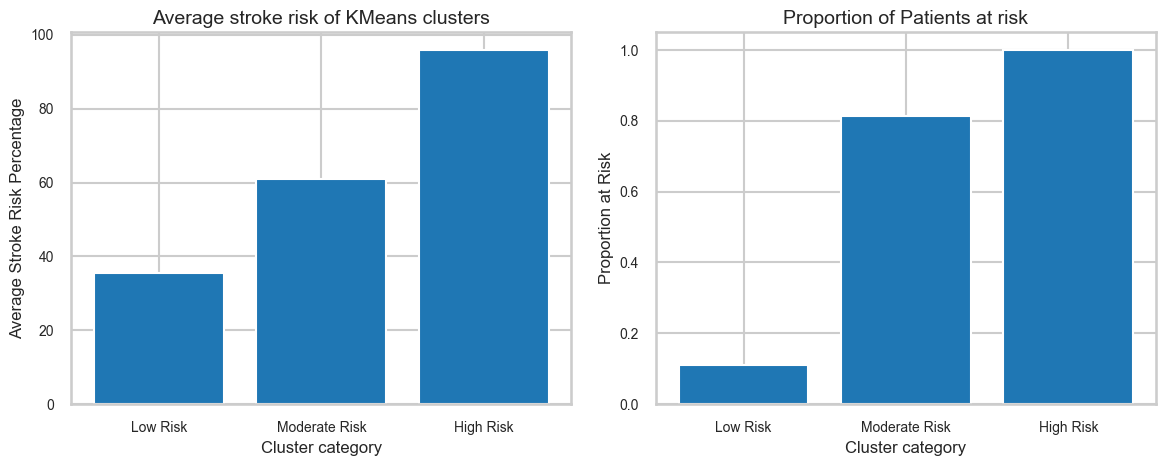

In [ ]:
def cluster_risk_comparison(df):
    """
    Compare average stroke risk and at-risk proportion across clusters.
    """
    
    cluster_risk= df.groupby('cluster_label').agg(avg_stroke_risk= ('stroke_risk_pct', 'mean'), 
                                                  at_risk_pct = ('at_risk', 'mean'))

    order = ['Low Risk', 'Moderate Risk', 'High Risk']
    cluster_risk = cluster_risk.loc[order].reset_index()
    print('Cluster Risk summary:')
    display(cluster_risk)

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    #Stroke Risk Plot
    axes[0].bar(cluster_risk['cluster_label'], cluster_risk['avg_stroke_risk'])
    axes[0].set_title('Average stroke risk of KMeans clusters', fontsize=14)
    axes[0].set_xlabel('Cluster category', fontsize=12)
    axes[0].set_ylabel('Average Stroke Risk Percentage', fontsize=12)
    axes[0].tick_params(axis='x', labelsize=10)
    axes[0].tick_params(axis='y', labelsize=10)

    #Patient At Risk Proportion Plot
    axes[1].bar(cluster_risk['cluster_label'], cluster_risk['at_risk_pct'])
    axes[1].set_title('Proportion of Patients at risk', fontsize=14)
    axes[1].set_xlabel('Cluster category', fontsize=12)
    axes[1].set_ylabel('Proportion at Risk', fontsize=12)
    axes[1].tick_params(axis='x', labelsize=10)
    axes[1].tick_params(axis='y', labelsize=10)

    plt.tight_layout()
    plt.show()

    return cluster_risk

cluster_risk = cluster_risk_comparison(df)

#### 2.6 Gaussian Mixture Model (GMM) Comparison 

While K-Means assigns each point to exactly one cluster,  
a **Gaussian Mixture Model (GMM)** allows *probabilistic* membership, capturing overlap between patient groups.


Adjusted Rand Index (ARI): 0.319


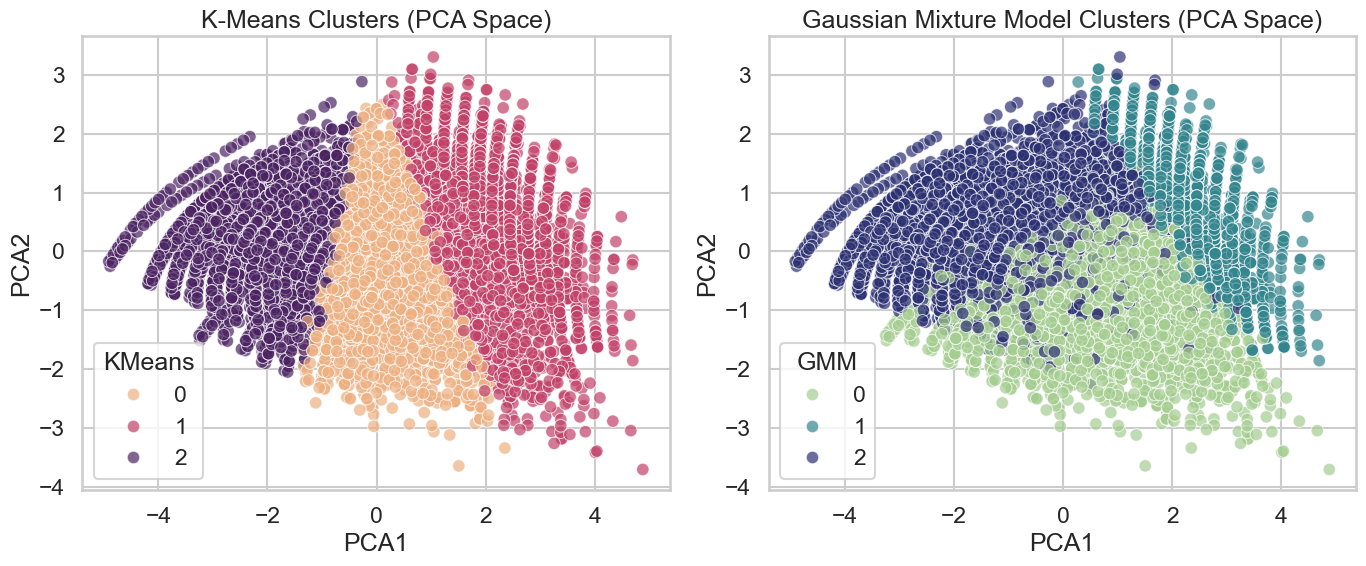

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score
from scipy.stats import mode

def compare_kmeans_gmm(df, X_scaled, k=3):
    """
    Compare K-Means and Gaussian Mixture Model (GMM) clustering.
    Computes Adjusted Rand Index (ARI) and visualizes both cluster assignments.
    """
    gmm= GaussianMixture(n_components=k, random_state=42)
    gmm_labels= gmm.fit_predict(X_scaled)
    kmeans_labels=df['KMeans']

    # Align GMM labels with K-Means labels
    aligned_labels= np.zeros_like(gmm_labels)
    for i in range(k):
        mask= (gmm_labels == i)
        aligned_labels[mask]= mode(kmeans_labels[mask])[0]
    gmm_labels= aligned_labels
    df['GMM']= gmm_labels

    ari = adjusted_rand_score(kmeans_labels, gmm_labels)
    print(f'Adjusted Rand Index (ARI): {ari:.3f}')

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    # K-Means Plot
    sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='KMeans', ax=axes[0], alpha=0.7, palette='flare')
    axes[0].set_title('K-Means Clusters (PCA Space)')
    # GMM Plot
    sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='GMM',ax=axes[1], alpha=0.7, palette='crest')
    axes[1].set_title('Gaussian Mixture Model Clusters (PCA Space)')

    plt.tight_layout()
    plt.show()

    return df, ari

df, ari_aligned = compare_kmeans_gmm(df, X_scaled, k=3)

<!-- END QUESTION -->

### Part 3 - Predictive Modeling: Stroke Risk Classification & Regression


#### 3.1 Feature Preparation (Symptoms Only) 

In this step, we identify and prepare symptom-based features for later modeling.  
These features capture physical and cardiovascular symptoms which may contribute to stroke risk.


Selected features: 
                Feature  Chi2_Score
1               high_bp  986.194531
0            chest_pain  575.386788
13          sleep_apnea  434.000646
3          short_breath  358.356308
11     chest_discomfort  352.239581
2   irregular_heartbeat  310.312262
4               fatigue  173.497765
12     cold_extremities  141.394956
5             dizziness  132.121512
6              swelling  120.768475


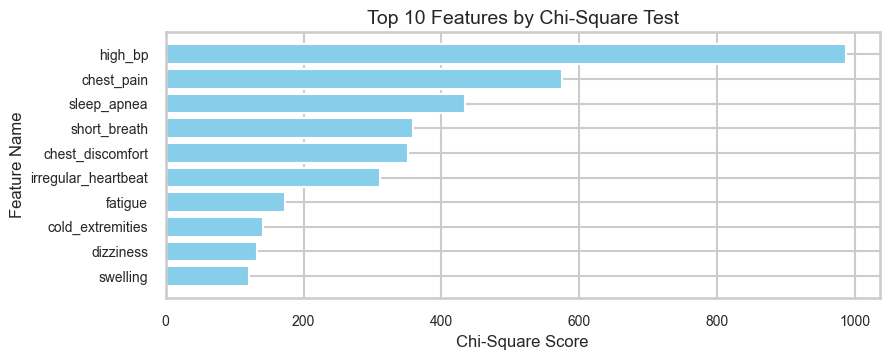

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

def prepare_symptom_features(df):
    """
    Select and scale symptom-related features for modeling.
    """  
    symptom_cols = [
    'chest_pain', 'high_bp', 'irregular_heartbeat', 'short_breath', 'fatigue','dizziness', 'swelling', 
    'neckjaw_pain', 'excess_sweating', 'persistent_cough', 'nausea_vomiting', 'chest_discomfort', 'cold_extremities', 
    'sleep_apnea', 'anxiety']

    # Selecting features using Chi-Square test
    selector1= SelectKBest(score_func= chi2, k=10)
    selector1.fit_transform(df[symptom_cols], df['at_risk'])

    selected_col_mask = selector1.get_support()

    scores = selector1.scores_
    feature_scores = pd.DataFrame({
        'Feature': df[symptom_cols].columns,
        'Chi2_Score': scores
    }).sort_values(by='Chi2_Score', ascending=False).head(10)

    print(f'Selected features: \n{feature_scores}')

    # Plotting top-10 features 
    plt.figure(figsize=(10, 4))
    plt.barh(feature_scores['Feature'], feature_scores['Chi2_Score'], color='skyblue')
    plt.gca().invert_yaxis() 
    plt.title('Top 10 Features by Chi-Square Test', fontsize=14)
    plt.xlabel('Chi-Square Score', fontsize=12)
    plt.ylabel('Feature Name', fontsize=12)
    plt.tight_layout()
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

    preprocessor= StandardScaler()
    preprocessor.fit_transform(df[symptom_cols])

    return feature_scores['Feature'].values, preprocessor
    

symptom_cols, preprocessor = prepare_symptom_features(df)

#### 3.2 Regression – Predict Stroke Risk Percentage 

Train regression models using symptom-only features to predict the continuous variable `stroke_risk_pct`.  
Evaluate them using **RMSE**, **MAE**, and **R²**.

Regression Model Performance:


,Model,RMSE,MAE,R²
4,XGBoost,19.252193,15.480062,0.473957
2,Linear Regression,19.372182,15.775347,0.467379
1,Random Forest,19.499684,15.560067,0.460345
3,SVR,19.621259,15.053683,0.453595
0,KNN,21.878193,17.345100,0.320665


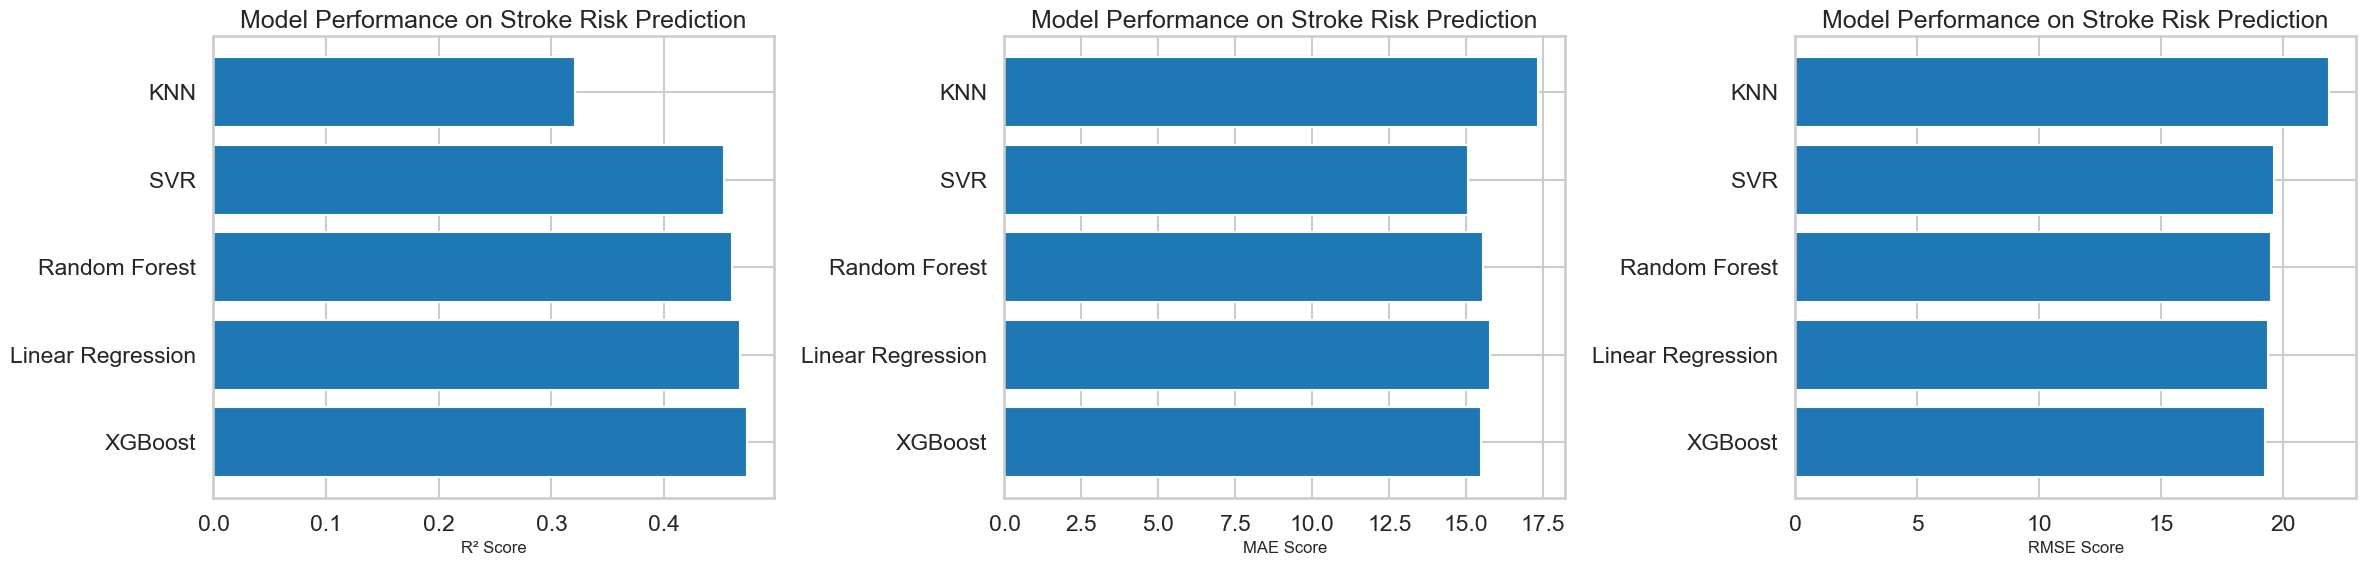

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor

def train_regressors(df, symptom_cols, preprocessor):
    """
    Train and evaluate multiple regression models for stroke risk prediction.
    """
    # test-train split
    X, y = df[symptom_cols], df['stroke_risk_pct']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # scaling features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    models = {
        'KNN': KNeighborsRegressor(),
        'Random Forest': RandomForestRegressor(random_state=42),
        'Linear Regression': LinearRegression(),
        'SVR': SVR(),
        'XGBoost': XGBRegressor(
            random_state=42,
            n_estimators=200,       
            learning_rate=0.1,      
            max_depth=4,            
            subsample=0.8,         
            colsample_bytree=0.8,
            objective='reg:squarederror'
        )
    }

    results = []

    # Model training and evaluation
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_predict = model.predict(X_test)
        
        rmse = np.sqrt(mean_squared_error(y_test, y_predict))
        mae = mean_absolute_error(y_test, y_predict)
        r2 = r2_score(y_test, y_predict)
        
        results.append({'Model': name, 'RMSE': rmse, 'MAE': mae, 'R²': r2})

    results_df = pd.DataFrame(results).sort_values(by='R²', ascending=False)

    print('Regression Model Performance:')
    display(results_df)

    # Plotting model performance
    fig, axes = plt.subplots(1, 3, figsize=(24, 6))
    axes[0].barh(results_df['Model'], results_df['R²'])
    axes[0].set_xlabel('R² Score', fontsize=12)
    axes[0].set_title('Model Performance on Stroke Risk Prediction')

    axes[1].barh(results_df['Model'], results_df['MAE'])
    axes[1].set_xlabel('MAE Score',fontsize=12)
    axes[1].set_title('Model Performance on Stroke Risk Prediction')

    axes[2].barh(results_df['Model'], results_df['RMSE'])
    axes[2].set_xlabel('RMSE Score',fontsize=12)
    axes[2].set_title('Model Performance on Stroke Risk Prediction')
    
    plt.tight_layout()
    plt.show()

    return results_df

reg_df = train_regressors(df, symptom_cols, preprocessor)

#### Q3.3 Best Regression Model – Feature Importance 

For the regression model evaluated, visualize its **most important features** influencing the predicted stroke risk percentage.

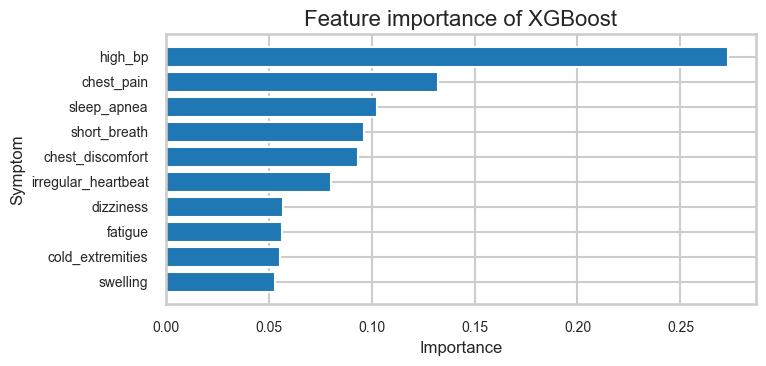

In [ ]:
def analyze_best_regressor(df, reg_df, symptom_cols, preprocessor):
    """
    Display top features for the best-performing regression model.
    """
    # Identifying model with highest R²
    X, y= df[symptom_cols], df['stroke_risk_pct']
    best_model= reg_df.sort_values(by='R²', ascending=False).iloc[0]['Model']

    if best_model=='XGBoost':
        model= XGBRegressor(
            random_state=42,
            n_estimators=200,       
            learning_rate=0.1,      
            max_depth=4,            
            subsample=0.8,         
            colsample_bytree=0.8,
            objective='reg:squarederror'
        )
    elif best_model=='Linear Regression':
        model= LinearRegression()
    elif best_model=='SVR':
        model=SVR()
    elif best_model=='Random Forest':
        model= RandomForestRegressor(random_state=42)
    elif best_model=='KNN':
        model= KNeighborsRegressor()
    model.fit(X,y)

    if hasattr(model, "feature_importances_"):  
        importance = model.feature_importances_
        importance_df = pd.DataFrame({
            'Feature': symptom_cols,
            'Importance': importance
        }).sort_values(by='Importance', ascending=False)
    elif hasattr(model, "coef_"):  
        importance = np.abs(model.coef_)
        importance_df = pd.DataFrame({
            'Feature': symptom_cols,
            'Importance': importance
        }).sort_values(by='Importance', ascending=False)

    importance_df = importance_df.sort_values(by='Importance', ascending=True)
    plt.figure(figsize=(8,4))
    plt.barh(importance_df['Feature'], importance_df['Importance'])
    plt.title(f'Feature importance of {best_model}', fontsize=16)
    plt.ylabel("Symptom", fontsize=12)
    plt.xlabel("Importance", fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()

best_reg_name = analyze_best_regressor(df, reg_df, symptom_cols, preprocessor)


#### 3.4 Classification – Predict Stroke Risk Category 

Using the same symptom-only features, train classification models to predict whether a patient is **at risk of stroke (1)** or **not at risk (0)**.  
Evaluate using **AUC**, **Accuracy**, **F1**, and **Balanced Accuracy**.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, balanced_accuracy_score

def train_classifiers(df, symptom_cols, preprocessor):
    """
    Train and evaluate multiple classification models to predict at-risk status.
    """
    X, y = df[symptom_cols], df['at_risk']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    models ={
        'Random Forest Classifier': RandomForestClassifier(random_state=42, n_estimators=200),
        'KNC': KNeighborsClassifier(),
        'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced'),
        'SVC': SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, class_weight='balanced', random_state=42),
        'XG Boost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
    }

    # Model training and evaluation
    res= []
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred= model.predict(X_test)
        y_prob= model.predict_proba(X_test)[:, 1] 

        res.append({
            "Model": name,
            "AUC": roc_auc_score(y_test, y_prob),
            "Accuracy": accuracy_score(y_test, y_pred),
            "F1": f1_score(y_test, y_pred),
            "Balanced Accuracy": balanced_accuracy_score(y_test, y_pred)
        })

    res = pd.DataFrame(res).sort_values(by='Accuracy', ascending=False)
    return res

cls_df = train_classifiers(df, symptom_cols, preprocessor)

Additionally using a Stacking ensemble (Random Classifier, Decision tree, Gausian NB, SVM, Logistic Regression and XGBoost) to improve accuracy and best combine strengths from each model

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.metrics import classification_report

# Feature selection
symptom_cols = ['chest_pain','high_bp','irregular_heartbeat','short_breath','fatigue','dizziness','swelling','neckjaw_pain','excess_sweating','persistent_cough','nausea_vomiting','chest_discomfort','cold_extremities','sleep_apnea','anxiety']
x_cols= ['age','gender'] + symptom_cols
if df['gender'].dtype == 'object':
    df['gender'] = df['gender'].map({'Male':1,'Female':0}).fillna(0).astype(int)
X = df[x_cols].copy()
y = df['at_risk'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print('Train shape:', X_train.shape, '\nTest shape:', X_test.shape)

# Scaling and SMOTE
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)
print('Resampled train distribution:\n', pd.Series(y_train).value_counts())

base_learners = [
    ('rf', RandomForestClassifier(n_estimators=200, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('nb', GaussianNB()),
    ('lr', LogisticRegression(max_iter=1000, class_weight='balanced')),
    ('xgb', XGBClassifier(random_state=42, eval_metric='logloss')),
    ('svc', SVC(probability=True, random_state=42))
]

meta = SVC(probability=True, random_state=42, kernel='rbf',gamma='scale', C=1)
stack = StackingClassifier(estimators=base_learners, final_estimator=meta, cv=5, passthrough=False, n_jobs=-1)

# Fit model
stack.fit(X_train, y_train)

X_test= scaler.transform(X_test)
y_pred= stack.predict(X_test)
y_prob= stack.predict_proba(X_test)[:,1]

print('Accuracy:', accuracy_score(y_test, y_pred))
print('ROC AUC:', roc_auc_score(y_test, y_prob))
print('F1:', f1_score(y_test, y_pred))
print('Classification report:\n', classification_report(y_test, y_pred))

cls_df.loc[len(cls_df)] = {
            "Model": 'Stack classifier',
            "AUC": roc_auc_score(y_test, y_prob),
            "Accuracy": accuracy_score(y_test, y_pred),
            "F1": f1_score(y_test, y_pred),
            "Balanced Accuracy": balanced_accuracy_score(y_test, y_pred)
        }
cls_df = cls_df.sort_values(by='Accuracy', ascending=False)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = {'accuracy':'accuracy','roc_auc':'roc_auc','f1':'f1'}
scores = cross_validate(stack, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1, return_train_score=False)
print('CV Accuracy:', np.mean(scores['test_accuracy']))
print('CV ROC_AUC:', np.mean(scores['test_roc_auc']))
print('CV F1:', np.mean(scores['test_f1']))


Train shape: (11980, 17) 
Test shape: (2996, 17)
Resampled train distribution:
 at_risk
1    7375
0    7375
Name: count, dtype: int64
Accuracy: 0.9826435246995995
ROC AUC: 0.994566179350446
F1: 0.9859231185706551
Classification report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      1152
           1       0.98      0.99      0.99      1844

    accuracy                           0.98      2996
   macro avg       0.98      0.98      0.98      2996
weighted avg       0.98      0.98      0.98      2996

CV Accuracy: 0.9872542372881355
CV ROC_AUC: 0.9966206492387245
CV F1: 0.9872498416891778


In [24]:
print('Classification Model Performance:')
display(cls_df)

Classification Model Performance:


,Model,AUC,Accuracy,F1,Balanced Accuracy
5,Stack classifier,0.994566,0.982644,0.985923,0.981177
2,Logistic Regression,0.860496,0.781375,0.809648,0.789018
0,Random Forest Classifier,0.856002,0.773698,0.816459,0.760373
4,XG Boost,0.856821,0.773698,0.816459,0.760373
3,SVC,0.826560,0.757677,0.786471,0.767321
1,KNC,0.805434,0.735981,0.795131,0.706987



#### 3.5 Best Classification Model – Confusion Matrix & Feature Importance 



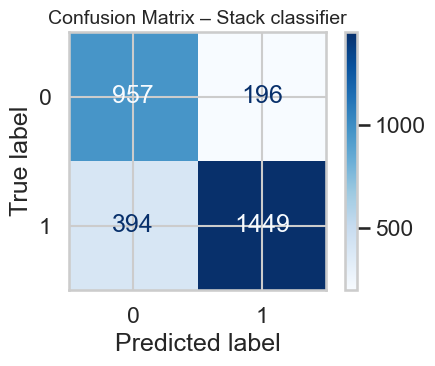

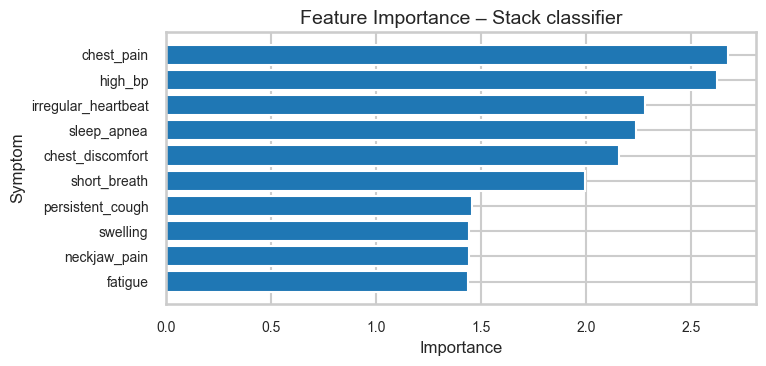

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance

def analyze_best_classifier(df, cls_df, symptom_cols, preprocessor):
    """
    Analyze and visualize the best classification model.
    """
    best_row = cls_df.sort_values(by="Accuracy", ascending=False).iloc[0]
    best_model_name = best_row["Model"]

    X, y = df[symptom_cols], df["at_risk"]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    if best_model_name== 'Stack classifier':
        model = stack
    if best_model_name== 'Random Forest Classifier':
        model= RandomForestClassifier(random_state=42, n_estimators=200)
    if best_model_name== 'KNC':
        model= KNeighborsClassifier()
    elif best_model_name == 'Logistic Regression':
        model= LogisticRegression(max_iter=1000, class_weight='balanced')
    elif best_model_name == 'SVC':
        model= SVC(kernel='rbf', gamma='scale', probability=True, class_weight='balanced', random_state=42)
    elif best_model_name == 'XG Boost':
        XGBClassifier(random_state=42, eval_metric='logloss')
    else:
        model = LogisticRegression(max_iter=1000, class_weight="balanced")

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    fig, ax = plt.subplots(figsize=(5, 4))
    disp.plot(ax=ax, cmap='Blues')
    plt.title(f'Confusion Matrix – {best_model_name}', fontsize=14)
    plt.tight_layout()
    plt.show()

    # Feature Importance
    if hasattr(model, 'feature_importances_'):
        importance = model.feature_importances_
        imp_df = pd.DataFrame({
            'Feature': symptom_cols,
            'Importance': importance
        }).sort_values(by='Importance', ascending=False)
    elif hasattr(model, "coef_"):
        coef = np.ravel(model.coef_) if model.coef_.ndim > 1 else model.coef_
        imp_df = pd.DataFrame({
            'Feature': symptom_cols,
            'Importance': np.abs(coef)
        }).sort_values(by='Importance', ascending=False)

    # Plotting top-10 feature importances
    top_imp = imp_df.sort_values(by='Importance', ascending=False).head(10)
    plt.figure(figsize=(8,4))
    plt.barh(top_imp['Feature'], top_imp['Importance']) 
    plt.gca().invert_yaxis() 
    plt.title(f'Feature Importance – {best_model_name}', fontsize=14)
    plt.xlabel('Importance', fontsize=12)
    plt.ylabel('Symptom', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()

    return best_model_name


best_cls_name = analyze_best_classifier(df, cls_df, symptom_cols, preprocessor)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### 3.6 Kaggle Submission 

Created a **submission DataFrame** with columns:  
   - `id` (sequential from 1 to n)  
   - `at_risk` (predicted 0 or 1)  


In [26]:
# training stack model on entire dataset
x_cols= ['age','gender'] + symptom_cols 
if df['gender'].dtype == 'object':
    df['gender'] = df['gender'].map({'Male':1,'Female':0}).fillna(0).astype(int)
X = df[x_cols].copy()
y = df['at_risk'].copy()

X= scaler.fit_transform(X)
X, y = SMOTE(random_state=42).fit_resample(X, y)
stack.fit(X, y)

# Prediciting output of test dataset
test_df = pd.read_csv('strokeX_test.csv')

if test_df['gender'].dtype == 'object':
    test_df['gender'] = test_df['gender'].map({'Male':1,'Female':0}).fillna(0).astype(int)
X_test= test_df[x_cols].copy()
X_test= scaler.transform(X_test)
preds= stack.predict(X_test)

sub= pd.DataFrame({'id': np.arange(1, len(preds) + 1),
                    'at_risk': preds})
print(f'Kaggle submission file shape: {sub.shape}')
sub.to_csv('kaggle_submission.csv', index=False)



Kaggle submission file shape: (3745, 2)


<!-- END QUESTION -->

